In [3]:
#https://gis-hennepin.hub.arcgis.com/datasets/hennepin::county-parcels/explore
!wget -O hennepin_county_parcels.zip "https://opendata.arcgis.com/api/v3/datasets/7975aabf6e1e42998a40a4b085ffefdf_1/downloads/data?format=shp&spatialRefId=26915&where=1%3D1"

--2023-10-19 17:02:06--  https://opendata.arcgis.com/api/v3/datasets/7975aabf6e1e42998a40a4b085ffefdf_1/downloads/data?format=shp&spatialRefId=26915&where=1%3D1
Resolving opendata.arcgis.com (opendata.arcgis.com)... 23.23.51.121, 44.215.202.167, 54.197.243.216
Connecting to opendata.arcgis.com (opendata.arcgis.com)|23.23.51.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: 'hennepin_county_parcels.zip'

hennepin_county_par     [        <=>         ] 117.88M  14.5MB/s    in 8.9s    

2023-10-19 17:02:15 (13.3 MB/s) - 'hennepin_county_parcels.zip' saved [123604042]



In [4]:
!unzip hennepin_county_parcels.zip

Archive:  hennepin_county_parcels.zip
  inflating: County_Parcels.shp      
  inflating: County_Parcels.shx      
  inflating: County_Parcels.dbf      
 extracting: County_Parcels.cpg      
  inflating: County_Parcels.prj      
  inflating: County_Parcels.xml      


In [5]:
!ogr2ogr -where "MUNIC_NM='EDINA'" Edina_Parcels.shp County_Parcels.shp

Warning 1: One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.


In [54]:
import geopandas
parcels = geopandas.read_file("Edina_Parcels.shp").to_crs("epsg:26850")
parcels["sqft"] = parcels.geometry.area
parcels.head()

,OBJECTID,PID,PID_TEXT,DIV_STATUS,FEATURECOD,STATE_CD,TORRENS_TY,HOUSE_NO,FRAC_HOUSE,STREET_NM,...,VET_EXCL4,HMS_EXCL4,NET_TC4,NET_TAX4,LAT,LON,ShapeSTAre,ShapeSTLen,geometry,sqft
0,31263,0511621110004,(4),None,501,905,T,6304,None,LIMERICK LA,...,0,0,0,0.0,-93.362586,44.887710,1633.476409,161.430055,"POLYGON ((2854786.787 288491.265, 2854803.878 ...",17604.593882
1,31264,0511621110009,(9),None,501,905,T,5313,None,WHITING AVE,...,0,0,0,0.0,-93.359525,44.887624,796.529827,119.472852,"POLYGON ((2855551.037 288464.968, 2855550.047 ...",8584.507241
2,31265,0511621110013,(13),None,501,905,T,5329,None,WHITING AVE,...,0,0,0,0.0,-93.360542,44.887634,796.538643,119.474496,"POLYGON ((2855287.293 288465.414, 2855286.101 ...",8584.601218
3,31267,0511621110002,(2),None,501,905,T,6312,None,LIMERICK LA,...,0,0,0,0.0,-93.363368,44.887390,1147.869277,146.923570,"POLYGON ((2854594.629 288230.922, 2854577.009 ...",12371.024493
4,31268,0511621110055,(55),None,501,880,T,6205,None,CRESCENT DR,...,0,0,0,0.0,-93.362561,44.891031,2824.507027,228.127006,"POLYGON ((2854807.575 289710.615, 2854802.582 ...",30440.694154


<Axes: >

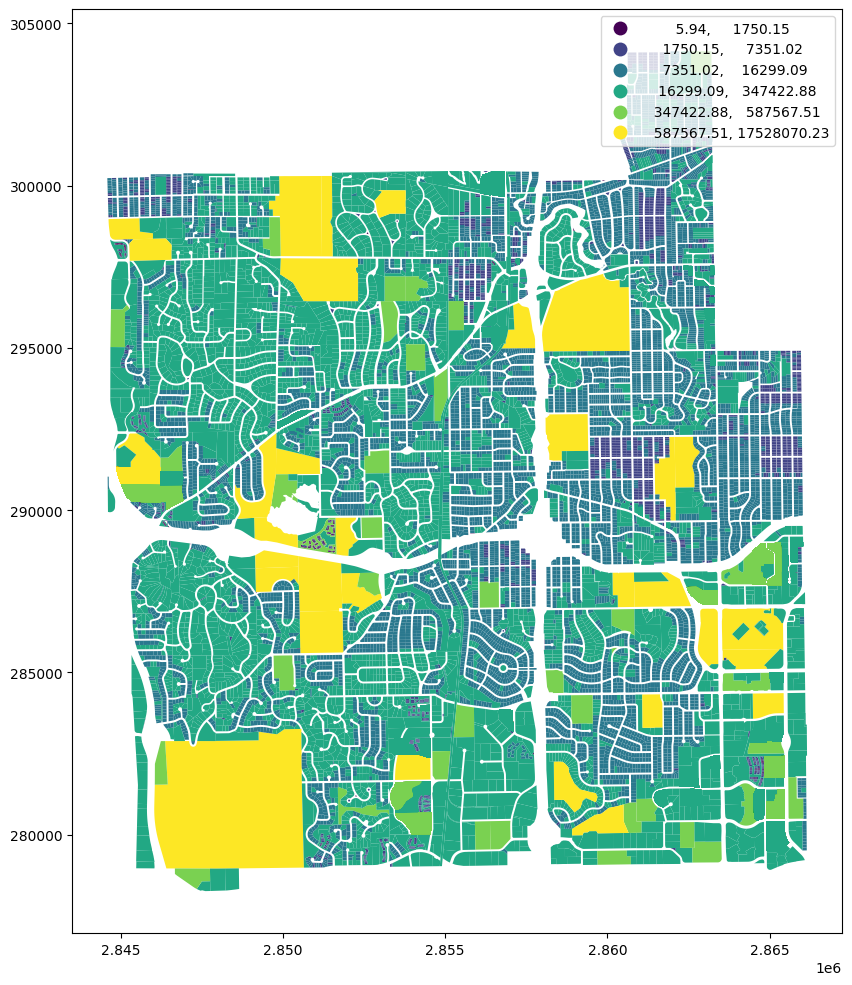

In [55]:
parcels.plot(column="sqft", scheme="percentiles", figsize=(12,12), legend=True)

In [57]:
parcels.explore(column="sqft", scheme="percentiles", tiles="CartoDB positron", legend=True, legend_kwds={"scale": False}).save("docs/Edina_Parcels.html")

In [58]:
#filtering for residential properties and excluding schools, churches via null sale_code
residential = parcels[(parcels["PR_TYP_NM1"] == 'RESIDENTIAL') & (parcels["SALE_CODE"].notnull())]
residential.head()

,OBJECTID,PID,PID_TEXT,DIV_STATUS,FEATURECOD,STATE_CD,TORRENS_TY,HOUSE_NO,FRAC_HOUSE,STREET_NM,...,VET_EXCL4,HMS_EXCL4,NET_TC4,NET_TAX4,LAT,LON,ShapeSTAre,ShapeSTLen,geometry,sqft
0,31263,0511621110004,(4),None,501,905,T,6304,None,LIMERICK LA,...,0,0,0,0.0,-93.362586,44.887710,1633.476409,161.430055,"POLYGON ((2854786.787 288491.265, 2854803.878 ...",17604.593882
1,31264,0511621110009,(9),None,501,905,T,5313,None,WHITING AVE,...,0,0,0,0.0,-93.359525,44.887624,796.529827,119.472852,"POLYGON ((2855551.037 288464.968, 2855550.047 ...",8584.507241
2,31265,0511621110013,(13),None,501,905,T,5329,None,WHITING AVE,...,0,0,0,0.0,-93.360542,44.887634,796.538643,119.474496,"POLYGON ((2855287.293 288465.414, 2855286.101 ...",8584.601218
3,31267,0511621110002,(2),None,501,905,T,6312,None,LIMERICK LA,...,0,0,0,0.0,-93.363368,44.887390,1147.869277,146.923570,"POLYGON ((2854594.629 288230.922, 2854577.009 ...",12371.024493
4,31268,0511621110055,(55),None,501,880,T,6205,None,CRESCENT DR,...,0,0,0,0.0,-93.362561,44.891031,2824.507027,228.127006,"POLYGON ((2854807.575 289710.615, 2854802.582 ...",30440.694154


<Axes: >

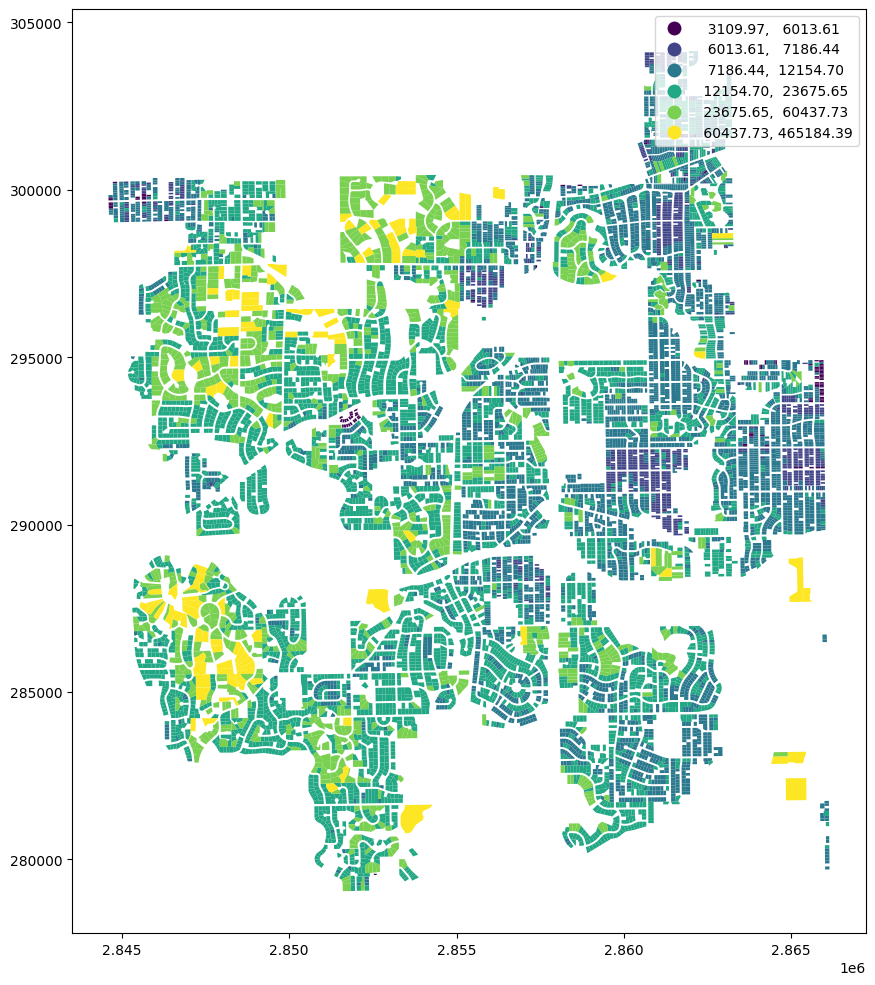

In [59]:
residential.plot(column="sqft", scheme="percentiles", figsize=(12,12), legend=True)

In [61]:

residential.explore(column="sqft", scheme="percentiles", tiles="CartoDB positron", legend=True, legend_kwds={"scale": False}).save("docs/Edina_Residential_Parcels.html")